# OpenClassrooms - Projet 2
## *Préparez des données pour un organisme de santé publique*
### Open Food Facts
- **[Site officiel](https://world.openfoodfacts.org/)**
- **[Lien vers le dataset](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip)**

## Importation des bibliothèques

In [184]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
# Je précise le type de certaines colonnes au moment de l'importation
# pour éviter un message d'erreur DtypeWarning (mixed types)
dtype_colonne = {
                'code': object,
                'created_t': object,
                'last_modified_t': object,
                'manufacturing_places': object,
                'manufacturing_places_tags': object,
                'emb_codes': object,
                'emb_codes_tags': object,
                'first_packaging_code_geo': object,
                'cities': object,
                'cities_tags': object,
                'allergens': object,
                'allergens_fr': object,
                'traces': object,
                'traces_tags': object,
                'traces_fr': object,
                'ingredients_from_palm_oil_tags': object,
                }

data_raw = pd.read_csv("fr.openfoodfacts.org.products.csv", dtype=dtype_colonne, sep='\t')
#data_raw = pd.read_csv("en.openfoodfacts.org.products.csv", dtype=dtype_colonne, sep='	')

print('Importation terminée')

Importation terminée


## Premier aperçu du dataset

In [186]:
print("Premières lignes : ")
display(data_raw.head())


"""print("Dernières lignes")
display(data_raw.tail())
print("\n", ("#"*80), "\n")"""

print("Résumé des valeurs numériques : ")
display(data_raw.describe())


print("- Le dataset contient", data_raw.shape[0], "lignes et", data_raw.shape[1], "colonnes.")
print("- Il y a", data_raw.duplicated().sum(), "lignes en doubles.")

colonnes_vides = data_raw.columns[data_raw.nunique() == 0]
print("-", len(colonnes_vides), "colonnes du dataset sont entièrement vides :")
display(colonnes_vides.tolist())

# verbose = True pour afficher toutes les colonnes
data_raw.info()

Premières lignes : 


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Résumé des valeurs numériques : 


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


- Le dataset contient 320772 lignes et 162 colonnes.
- Il y a 0 lignes en doubles.
- 16 colonnes du dataset sont entièrement vides :


['no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'melissic-acid_100g',
 'elaidic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


## Les données manquantes sont très nombreuses

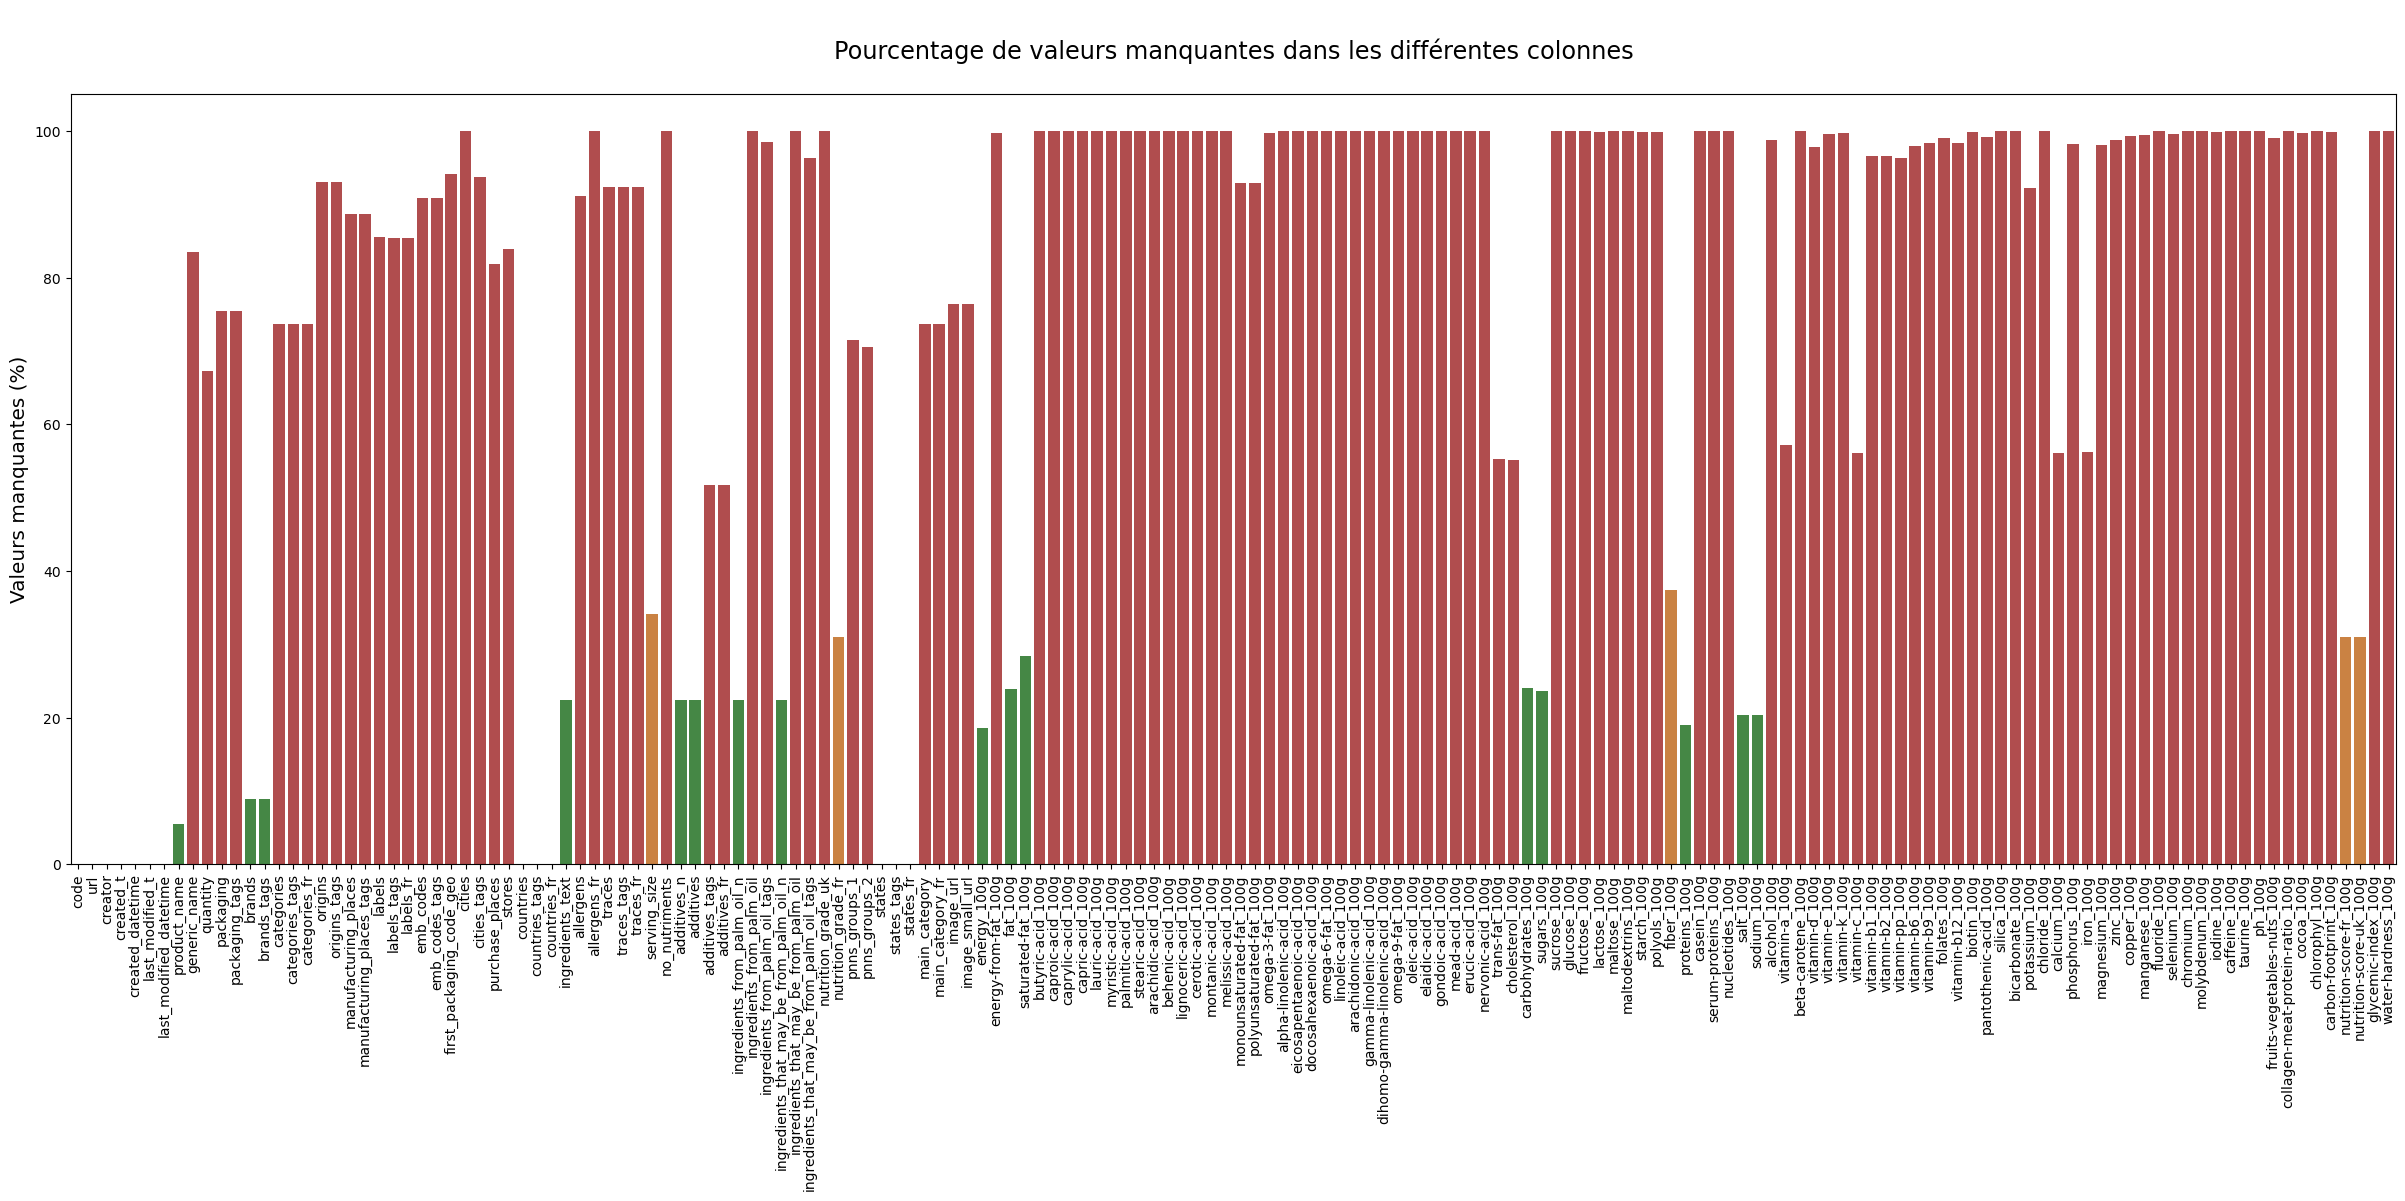


Il y a 128 colonnes avec plus de 50 % de données manquantes.


In [187]:
colonnes_incompletes = data_raw.isna().mean()

fig, ax = plt.subplots(figsize=(30,10))

# Création d'une palette personnalisée
colors = [{p<0.5: '#3A923A', 0.3<=p<=0.5: '#E1812C', p>0.5: '#C03D3E'}[True] for p in colonnes_incompletes.values.tolist()]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=colonnes_incompletes.index, y=colonnes_incompletes.values*100)

plt.xticks(rotation=90)
ax.set_title('\nPourcentage de valeurs manquantes dans les différentes colonnes\n', fontsize='xx-large')
ax.set_ylabel('Valeurs manquantes (%)', fontsize='x-large')

plt.show()

print("\nIl y a", len(colonnes_incompletes[colonnes_incompletes.values > 0.5]), "colonnes avec plus de 50 % de données manquantes.")

## Nettoyage

### Traitement de la colonne *code*

In [188]:
print("Il y a", data_raw['code'].isnull().sum(), "valeurs nulles dans la colonne code.")

# Suppression des lignes où 'code' est NaN
if data_raw['code'].isnull().sum() > 0:
    data_raw = data_raw[data_raw['code'].notna()]
    print("Valeurs nulles supprimées.")

print("Il y a", data_raw['code'].duplicated().sum(), "doubles dans la colonne code")


Il y a 23 valeurs nulles dans la colonne code.
Valeurs nulles supprimées.
Il y a 0 doubles dans la colonne code


### Suppression des colonnes avec plus de 90% de valeurs manquantes

In [189]:
colonnes_vides = data_raw.columns[data_raw.isnull().sum()/len(data_raw) >= 0.9]

# Si on veut conserver certaines colonnes malgré tout
colonnes_a_conserver = ['nutrition_grade_uk', 'water-hardness_100g']

# Colonnes à supprimer, moins les colonnes qu'on veut conserver
colonnes_vides = [x for x in colonnes_vides if x not in colonnes_a_conserver]

data_clean = data_raw.drop(columns=colonnes_vides)

### Sélection des colonnes qui nous intéressent

In [190]:
colonnes_diverses = [
                    'code',
                    'created_datetime',
                    'product_name',
                    'brands_tags',
                    'categories_tags',
                    'countries_tags',
                    'ingredients_text',
                    'serving_size',
                    'additives_n',
                    'additives_tags',
                    'ingredients_from_palm_oil_n',
                    'ingredients_that_may_be_from_palm_oil_n',
                    'nutrition_grade_uk',
                    'nutrition_grade_fr',
                    'pnns_groups_1',
                    'pnns_groups_2',
                    'states_tags',
                    'main_category',
                    ]

colonnes_nutriments = [x for x in data_clean.columns if  '_100g' in x]

colonnes_a_garder = colonnes_diverses + colonnes_nutriments

data_clean = data_clean[colonnes_a_garder]

### Creation d'une nouvelle colonne pays uniformisée

Je crée une nouvelle colonne *pays* à partir de *countries_tags* qui contiendra un pays par ligne (en Anglais).<br>
Pour les lignes de *countries_tags* qui contiennent plusieurs pays, je décide de ne garder que le premier.

Colonne pays créée
Nombre de valeurs différentes de la colonne pays avant traitement : 719
Nombre de valeurs différentes de la colonne pays après traitement : 167


count       166.000000
mean       1930.506024
std       15408.769012
min           1.000000
25%           2.000000
50%          10.000000
75%          71.000000
max      173013.000000
Name: code, dtype: float64

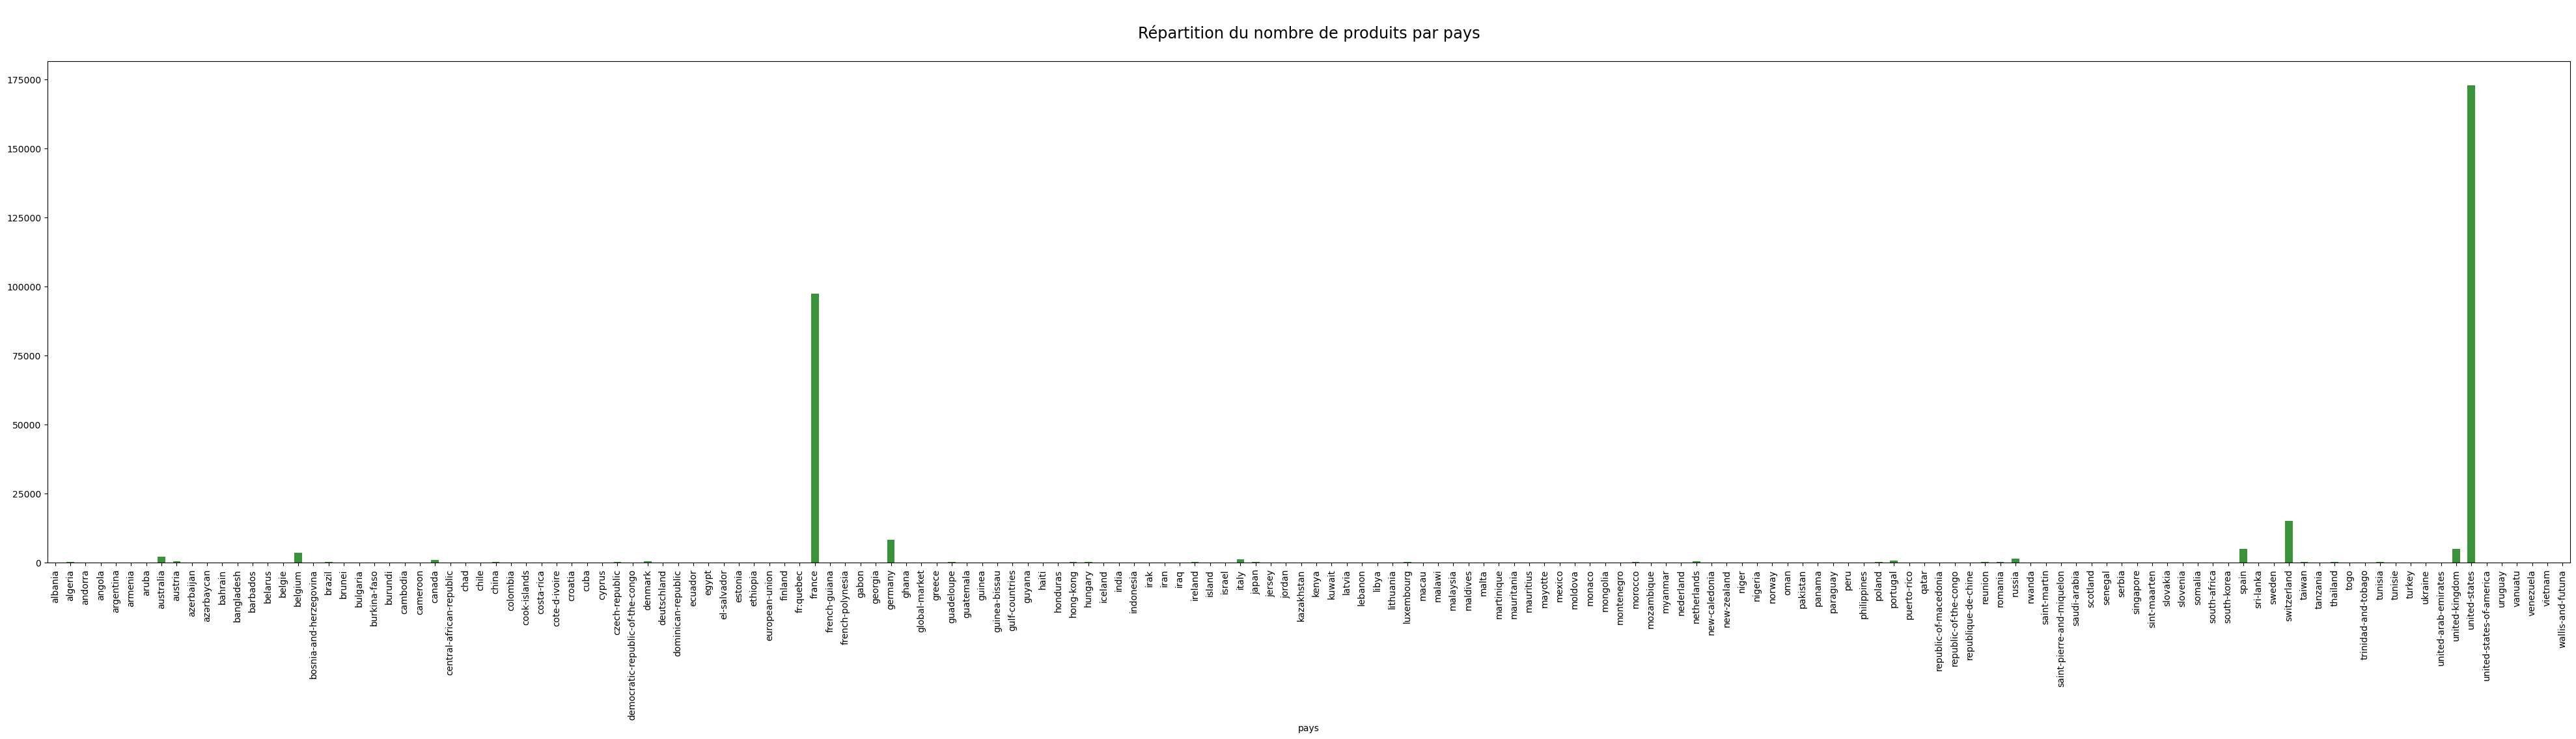

In [191]:
# Création d'une nouvelle colonne "pays", avec pour chaque ligne le contenu de "countries_tags" duquel j'ai enlevé les "en:"
data_clean = data_clean.assign(pays=data_clean['countries_tags'].str.replace(r'en:', '', regex=True))
print("Colonne pays créée")


print("Nombre de valeurs différentes de la colonne pays avant traitement :", len(data_clean['pays'].unique()))

# Pour les lignes de *countries_tags* qui contiennent plusieurs pays, je décide de ne garder que le premier.
data_clean['pays'] = data_clean['pays'].str.replace(',.*', '', regex=True)


# Dans ce dictionnaire sont stockées les valeurs invalides et les bonnes valeurs correspondantes
dico = {
        "سلطنة-عمان" : "oman",
        "السعودية" : "saudi-arabia",
        "other-日本" : "japan",
        "other-العراق" : "irak",
        "الإمارات-العربية-المتحدة" : "united-arab-emirates",
        "turkiye" : "turkey",
        "日本" : "japan",
        "other-japon" : "japan",
        "香港" : "hong-kong",
        "denemarken" : "denmark",
        "other-turquie" : "turkey",
        "quebec" : "canada",
        "भारत" : "india",
        "البحرين" : "bahrain",
        "world" : np.nan
        }

# On utilise le dictionnaire ci-dessus pour faire les corrections dans la colonne "pays"
data_clean.replace({"pays": dico},inplace=True)

print("Nombre de valeurs différentes de la colonne pays après traitement :", len(data_clean['pays'].unique()))

# Je prends le compte pour la colonne 'code' que je sais pleine à 100%
display(data_clean.groupby(['pays'])['code'].count().describe())


plt.figure(figsize=(50,10))
plt.title("\nRépartition du nombre de produits par pays\n", fontsize='xx-large')
data_clean.groupby(['pays'])['code'].count().plot.bar()
plt.show()




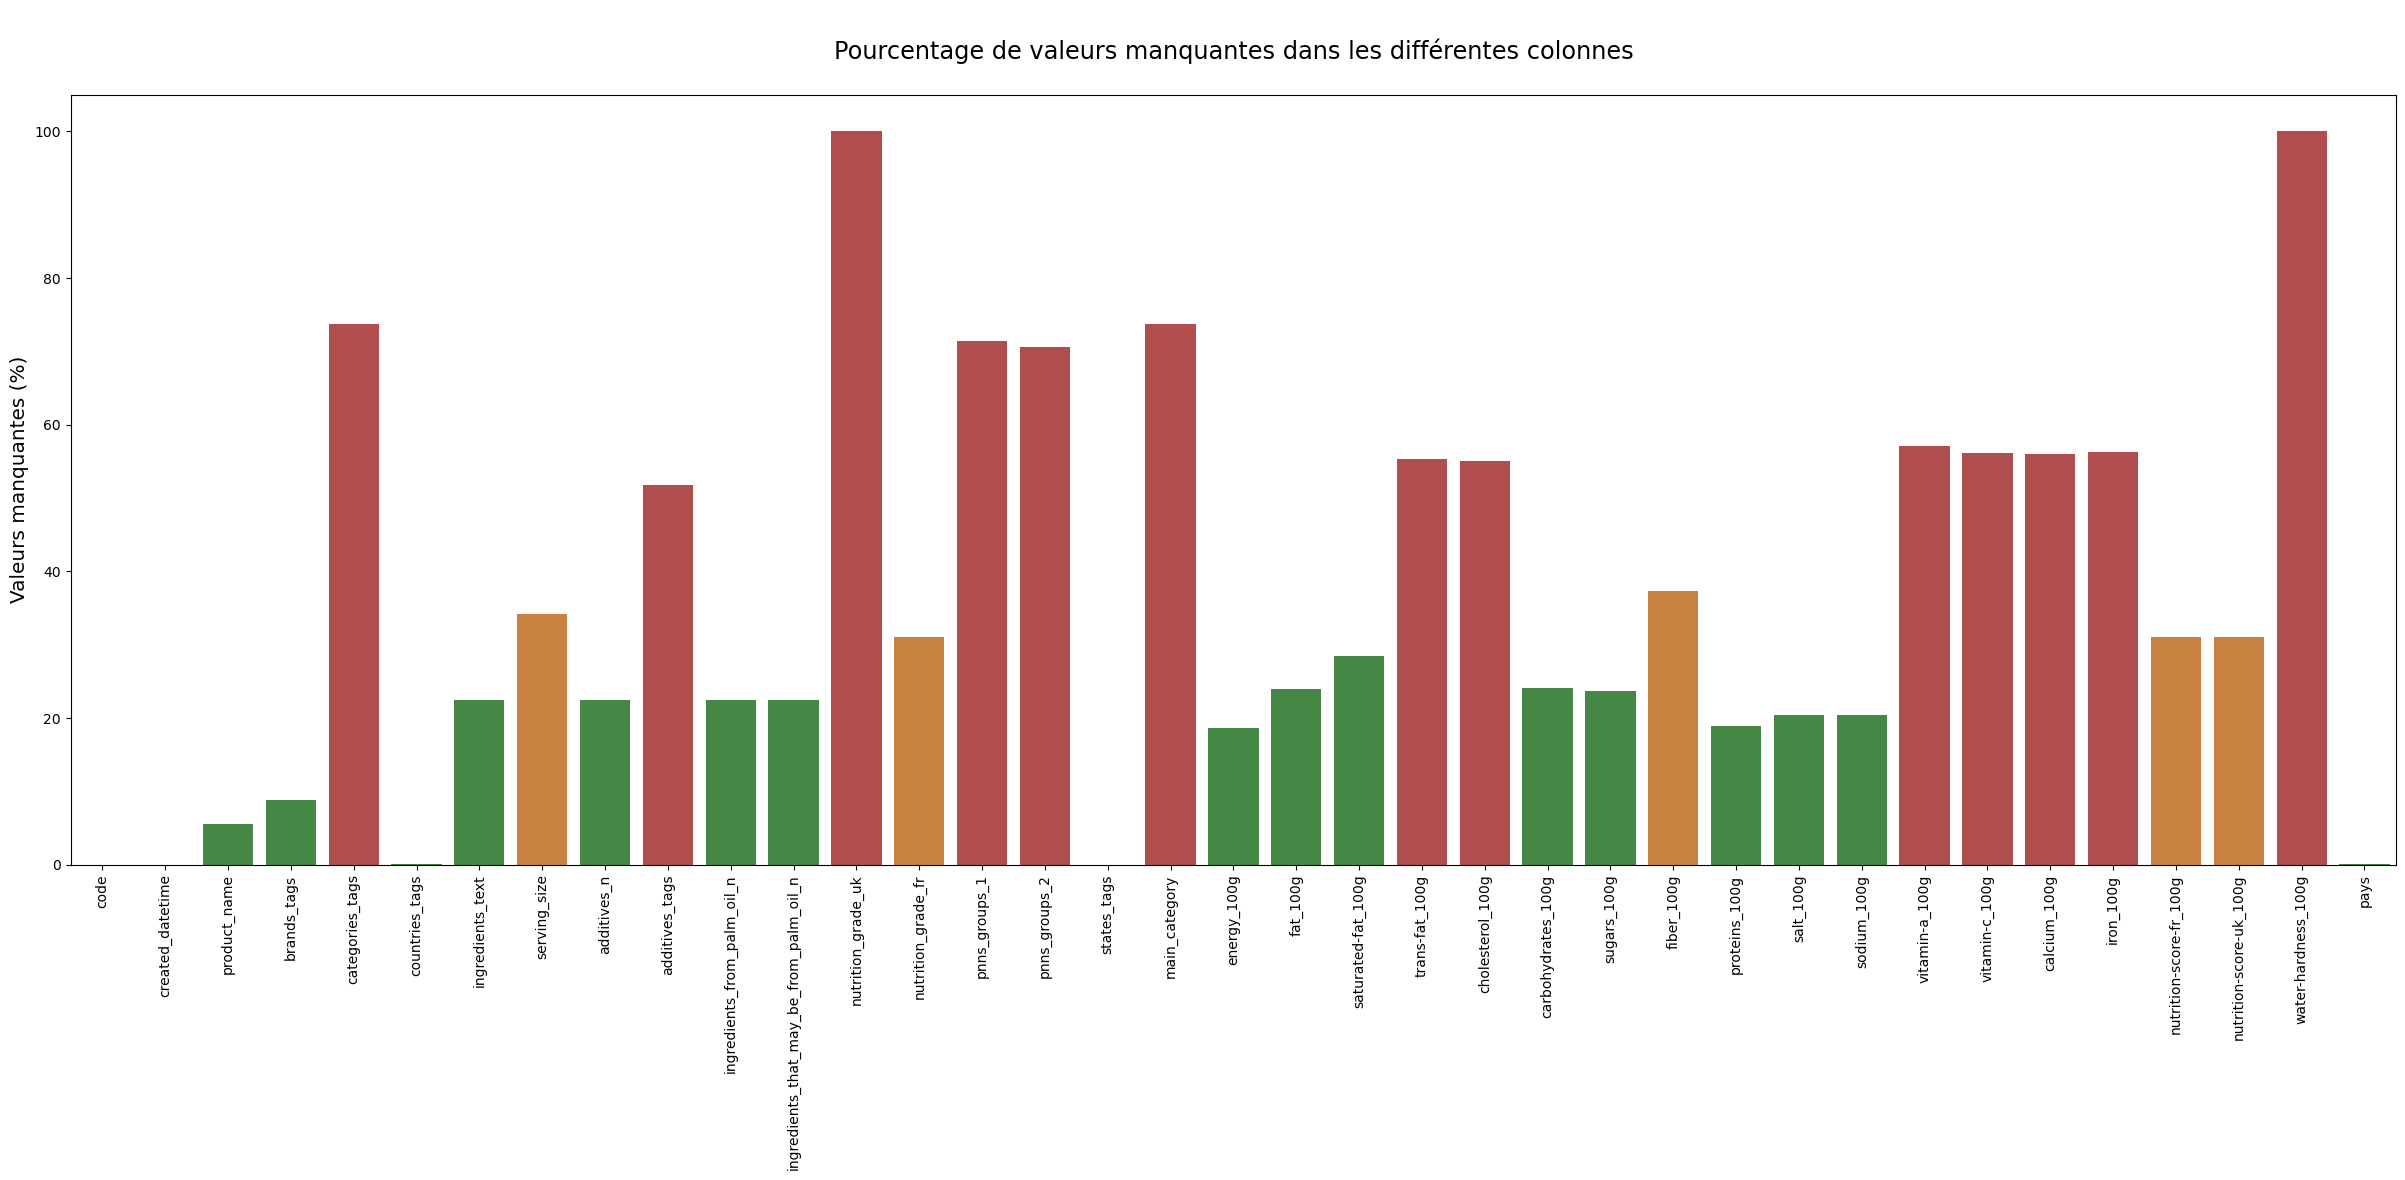


Il y a 13 colonnes avec plus de 50 % de données manquantes.


In [192]:
colonnes_incompletes = data_clean.isna().mean()

fig, ax = plt.subplots(figsize=(30,10))

# Création d'une palette personnalisée
colors = [{p<0.5: '#3A923A', 0.3<=p<=0.5: '#E1812C', p>0.5: '#C03D3E'}[True] for p in colonnes_incompletes.values.tolist()]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=colonnes_incompletes.index, y=colonnes_incompletes.values*100)

plt.xticks(rotation=90)
ax.set_title('\nPourcentage de valeurs manquantes dans les différentes colonnes\n', fontsize='xx-large')
ax.set_ylabel('Valeurs manquantes (%)', fontsize='x-large')

plt.show()

print("\nIl y a", len(colonnes_incompletes[colonnes_incompletes.values > 0.5]), "colonnes avec plus de 50 % de données manquantes.")